In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from ImgMapper import *
from IPython.core.display import HTML
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

In [2]:
df = pd.read_csv("../data/epsilon_gaussians.tsv", sep= "\t")

In [3]:
df.head()

,X,Y,Z
0,1.978175,1.214983,0
1,2.271627,0.168620,0
2,2.100079,-0.271028,0
3,1.802412,0.026659,0
4,2.473701,-0.340183,0


In [4]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, n_components=3, whiten=False)

In [5]:
print(pca.explained_variance_ratio_) 

[ 0.50216625  0.48378339  0.01405035]


In [6]:
pca_df = pd.DataFrame(pca.transform(df))

In [7]:
pca_df.head()

,0,1,2
0,0.260140,1.952504,0.177170
1,1.333664,2.064686,0.050874
2,1.734487,1.821286,-0.002191
3,1.392579,1.578321,0.033740
4,1.865791,2.177749,-0.010539


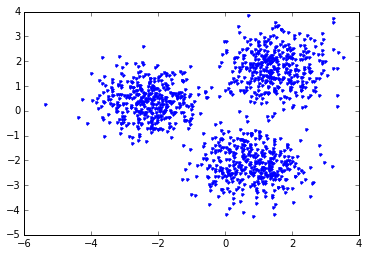

In [8]:
plt.plot(pca_df[0], pca_df[1], '.')

## DBSCAN Exploration

In [9]:
Xdist = squareform(pdist(np.array(df)))

In [10]:
def get_k_dist(distMatrix = Xdist, k = 4):
    distMatrix.sort()
    return sorted(distMatrix[:,k], reverse=True)

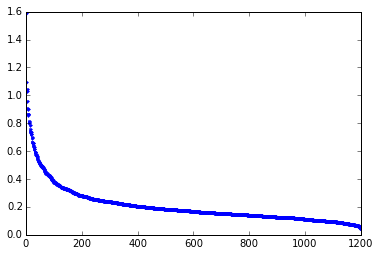

In [11]:
plt.plot(get_k_dist(k = 4), ".")

## TDA

In [12]:
tsneReducer = manifold.TSNE()
pcaReducer = PCA()


mapper = KeplerMapper(cluster_algorithm=cluster.DBSCAN(eps=200./1200., min_samples=4), 
             reducer = pcaReducer, nr_cubes=30, overlap_perc=0.6, 
             link_local=False, verbose=0)

data = mapper.fit_transform(np.array(df))
complex = mapper.map(data, dimension_index=[0,1], dimension_name="PCA")
mapper.visualize(complex, "results.html", "Synthetic Data Example", graph_charge=-50, graph_gravity=0.15)

In [13]:
HTML('<iframe src=results.html width=2000 height=900></iframe>')